# ***Check GPU connect***

In [1]:
print("oke nice")

oke nice


In [2]:
import torch 

print(torch.__version__) 
print(torch.cuda.is_available()) 
print(torch.cuda.get_device_name(0))

2.4.0
True
Tesla T4


In [3]:
!nvidia-smi

Fri Sep 13 12:37:32 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       3MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# ***Content***

## Clone dataset 

In [4]:
!pip install gdown

In [5]:
!git clone https://github.com/QuanHoangNgoc/data-temp.git

fatal: destination path 'data-temp' already exists and is not an empty directory.


## Install

In [6]:
# !pip -q install sentence-transformers
!pip -q install faiss-gpu

In [7]:
import os
from PIL import Image
import numpy as np
import faiss
# from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import random

## Check dataset and create image_files 

In [8]:
def get_imagelist(root_folder, glob="jpg"): 
    paths = []
    for dirpath, dirnames, filenames in sorted(os.walk(root_folder)): #!!! must sorted 
        for file in filenames:  
            fullpath = os.path.join(dirpath, file)
            if(fullpath.split(".")[-1] != glob): continue
            paths.append(fullpath) 
    return paths

4499 ['/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_140.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_28.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_95.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_34.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_201.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_242.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_27.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_147.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_245.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_32.jpg']


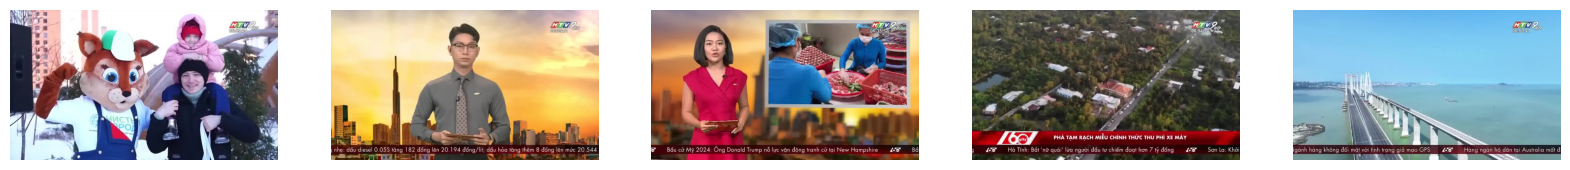

In [9]:
image_folder = "/kaggle/working/data-temp"

image_files = get_imagelist(image_folder)
print(len(image_files), image_files[:10]) 
selected_files = random.sample(image_files, 5)

plt.figure(figsize=(20, 5))

for i, file in enumerate(selected_files):
    image = Image.open(file)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")

plt.show()

## Create embeddings and meta 

In [10]:
# # new a embedding model 
# model = SentenceTransformer('clip-ViT-B-32')

# CHUNK_SIZE = 256

# # process each chunk 
# def process_chunk(chunk):
#     images = []
#     for image_file in chunk: images.append(Image.open(image_file))

#     chunk_embeddings = model.encode(images)
#     return chunk_embeddings


# # create the embeddings 
# embeddings = []
# for i in range(0, len(image_files), CHUNK_SIZE):
#     print(i)
#     chunk = image_files[i:i + CHUNK_SIZE]
#     embeddings.extend(process_chunk(chunk))
    
# embeddings 

In [11]:
import gdown  

def drive_down(file_id, name_output_file): 
    url = f'https://drive.google.com/uc?id={file_id}'  
    output = name_output_file  
    gdown.download(url, output, quiet=False)

### clone embedding 

In [12]:
file_id = '1AnwmsgIlTZ6yROoG-sAHXyyviSiDXAxd' 
drive_down(file_id, "emb.npy")
embeddings = np.load('emb.npy')

Downloading...
From (original): https://drive.google.com/uc?id=1AnwmsgIlTZ6yROoG-sAHXyyviSiDXAxd
From (redirected): https://drive.google.com/uc?id=1AnwmsgIlTZ6yROoG-sAHXyyviSiDXAxd&confirm=t&uuid=d1dd3674-3ff5-4652-9e5f-c480803b2bdf
To: /kaggle/working/emb.npy
100%|██████████| 448M/448M [00:03<00:00, 125MB/s]  


In [13]:
embeddings.shape 

(109419, 1024)

In [14]:
file_id = '1GPld4WR3bnGjUJm0y5lU90LkbBKyBegD' 
drive_down(file_id, "emb_blip.npy")
embeddings_blip = np.load('emb_blip.npy')

Downloading...
From (original): https://drive.google.com/uc?id=1GPld4WR3bnGjUJm0y5lU90LkbBKyBegD
From (redirected): https://drive.google.com/uc?id=1GPld4WR3bnGjUJm0y5lU90LkbBKyBegD&confirm=t&uuid=2c365e68-9e21-45d5-af90-a972728fbe14
To: /kaggle/working/emb_blip.npy
100%|██████████| 112M/112M [00:02<00:00, 44.7MB/s] 


In [16]:
embeddings_blip.shape

(109419, 256)

### clone meta

In [17]:
file_id = '16vgOEJMksbsjFuRjo0MDpDCBsLh0FpWE'
drive_down(file_id, "meta.pkl")

import pickle

with open('meta.pkl', 'rb') as file:
    meta = pickle.load(file)

Downloading...
From: https://drive.google.com/uc?id=16vgOEJMksbsjFuRjo0MDpDCBsLh0FpWE
To: /kaggle/working/meta.pkl
100%|██████████| 2.04M/2.04M [00:00<00:00, 159MB/s]


In [18]:
print(type(meta), len(meta), meta[:10])

<class 'list'> 109419 ['L01_V001_1.jpg', 'L01_V001_2.jpg', 'L01_V001_3.jpg', 'L01_V001_4.jpg', 'L01_V001_5.jpg', 'L01_V001_6.jpg', 'L01_V001_7.jpg', 'L01_V001_8.jpg', 'L01_V001_9.jpg', 'L01_V001_10.jpg']


## Create database 

In [19]:
# build vector db 
def create_database(embeddings): 
    dimension = len(embeddings[0])
    db = faiss.IndexFlatIP(dimension)
    db = faiss.IndexIDMap(db)

    # insert embeddings into database 
    vectors = np.array(embeddings).astype('float32')
    db.add_with_ids(vectors, np.array(range(len(embeddings))))
    return db 

In [20]:
db = create_database(embeddings)
db_blip = create_database(embeddings_blip)

In [43]:
db

<faiss.swigfaiss.IndexIDMap; proxy of <Swig Object of type 'faiss::IndexIDMapTemplate< faiss::Index > *' at 0x7a96a106d680> >

In [21]:
db_blip

<faiss.swigfaiss.IndexIDMap; proxy of <Swig Object of type 'faiss::IndexIDMapTemplate< faiss::Index > *' at 0x7a96a106f300> >

## Search

In [22]:
!pip install sentence-transformers==2.2.2
!pip install torchscale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=44f80d7752e11fde68efe643ff8c23659f6fed5cd2bbe0ea97ad9bc37e7232ab
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 kB 4.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 20.1 MB/s eta 0:00:00
  Created wheel for fairscale: filename=fairscale-0.4.0-py3-none-any.whl size=239917 sha256=56463267f63780ad33243401f406886

### set-up beit3 repo

In [23]:
file_id = '1Xf3XDVR59ONPNemQ0URS7-djDGssfXaN'
drive_down(file_id, "beit3.zip")
# !unzip beit3.zip 

Downloading...
From: https://drive.google.com/uc?id=1Xf3XDVR59ONPNemQ0URS7-djDGssfXaN
To: /kaggle/working/beit3.zip
100%|██████████| 708k/708k [00:00<00:00, 107MB/s]


In [24]:
os.listdir('/kaggle/working/BEiT3/checkpoints')

['beit3.spm']

In [25]:
file_id = '1e8qULfZLu26e8-wHdtJxCC6wfG72IWMp'
drive_down(file_id, "beit3.pth")

Downloading...
From (original): https://drive.google.com/uc?id=1e8qULfZLu26e8-wHdtJxCC6wfG72IWMp
From (redirected): https://drive.google.com/uc?id=1e8qULfZLu26e8-wHdtJxCC6wfG72IWMp&confirm=t&uuid=f798f2e2-64b5-408d-8985-16b33e88dc98
To: /kaggle/working/beit3.pth
100%|██████████| 1.35G/1.35G [00:21<00:00, 61.4MB/s]


### beit3 encoder model 

In [26]:
import BEiT3.beit3 as module

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = "beit3.pth"
sentencepiece_model = os.path.join('/kaggle/working/BEiT3/checkpoints', 'beit3.spm')

In [28]:
model, transform, tokenizer = module.load_model(device, checkpoint, sentencepiece_model)

/kaggle/working/BEiT3/utils_beit.py:526: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location='cpu')


Load ckpt from beit3.pth
Load state_dict by model_key = model


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### set-up blip repo 

In [29]:
file_id = '1ZopbJ1HEKjKonPRURjsAcbhGBR6vnBK5'
drive_down(file_id, "blip.zip")
# !unzip blip.zip

Downloading...
From: https://drive.google.com/uc?id=1ZopbJ1HEKjKonPRURjsAcbhGBR6vnBK5
To: /kaggle/working/blip.zip
100%|██████████| 14.7M/14.7M [00:00<00:00, 26.9MB/s]


In [30]:
!unzip blip.zip

Archive:  blip.zip
replace BLIP/.git/config? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [31]:
os.listdir("BLIP")

['state.db',
 'train_vqa.py',
 'pretrain.py',
 'data',
 'CODEOWNERS',
 'demo.ipynb',
 'README.md',
 'transform',
 'SECURITY.md',
 'utils.py',
 'eval_retrieval_video.py',
 'submit.zip',
 'eval_nocaps.py',
 'CODE_OF_CONDUCT.md',
 '.git',
 'predict.py',
 'train_retrieval.py',
 'train_nlvr.py',
 'submit',
 'configs',
 'BLIP.gif',
 'models',
 '__pycache__',
 'cog.yaml',
 'train_caption.py',
 'LICENSE.txt',
 'requirements.txt']

In [32]:
%cd /kaggle/working/BLIP

/kaggle/working/BLIP


In [33]:
!ls

BLIP.gif	    data		     submit
CODEOWNERS	    demo.ipynb		     submit.zip
CODE_OF_CONDUCT.md  eval_nocaps.py	     train_caption.py
LICENSE.txt	    eval_retrieval_video.py  train_nlvr.py
README.md	    models		     train_retrieval.py
SECURITY.md	    predict.py		     train_vqa.py
__pycache__	    pretrain.py		     transform
cog.yaml	    requirements.txt	     utils.py
configs		    state.db


### blip encoder 

In [35]:
import models.blip_itm as blip 

In [36]:
blip_encoder = blip.blip_itm().eval()
blip_encoder = blip_encoder.to(device) 

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [37]:
random_image = np.random.randint(0, 256, size=(224, 224, 3), dtype=np.uint8)
image = Image.fromarray(random_image)
image_tensor = torch.from_numpy(np.array(image))
blip_image = image_tensor.to(device)

In [38]:
def blip_encode_text(text): 
    return blip_encoder.get_feature(blip_image, caption=text, mode="text").cpu().detach().numpy() 

In [39]:
blip_encode_text("A people").shape

(1, 256)

### search combine 

In [40]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=7efa83f048fd2c942076b92a5f97a3c142e7e3ffdd69caa9480b9a2e2883fc4a
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

In [121]:
from googletrans import Translator
translator = Translator()
from sklearn.metrics.pairwise import cosine_similarity
vectors_list = (np.array(embeddings).astype('float32'), np.array(embeddings_blip).astype('float32'))


def resort(id_list, encodes): 
    print("- collection is:", vectors_list[0][id_list].shape, vectors_list[1][id_list].shape) # collection 
    
    alphas = [0.95, 0.5]
    print("- alphas for pair is:", alphas)
    sims = 0 
    for i in range(len(encodes)): 
        sims = cosine_similarity(encodes[i], vectors_list[i][id_list]) * alphas[i] + sims 
    print("- sims matrix is:", sims.shape) # recal sim of id_list [(1, .)]
    
    final_ids = [i for _, i in sorted(zip(-sims[0], id_list))]
    final_sims = [s for s, _ in sorted(zip(-sims[0], id_list))]
    
    print("- final ids is:", len(final_ids), final_ids[:10]) 
    print("- final sims is:", len(final_sims), final_sims[:10]) 
    return final_ids 


def search_on_pair(query, db_list: tuple, meta, top_k=100):
    # Query can be image-path or text
    if query.endswith(".jpg"): query = Image.open(query) #!!! not process with image 
    text = translator.translate(query, dest='en').text
    print(text) 
    
    # Get encode of text query 
    encodes = [module.encode_text(model, tokenizer, text, device), blip_encode_text(text)]
    encodes = [x.astype("float32").reshape(1, -1) for x in encodes]
    print("- encode is:", encodes[0].shape, encodes[1].shape) 
    
    # Get union-id-list 
    T = len(meta)
    print("- T is:", T) 
    union_set_list = set() 
    for i, db in enumerate(db_list): 
        distances, I = db.search(encodes[i], T)
        union_set_list = union_set_list.union(set(I[0]))
        print(I[0][:10])
    
    # Resort union-id-list 
    id_list = list(union_set_list) 
    indices = resort(id_list, encodes)[:top_k]
    retrieved_meta = [meta[i] for i in indices]
    print("- ANSWER IS:", retrieved_meta[:10], "\n\n")
    return query, retrieved_meta

In [106]:
query = "Một con thuyền chạy được trên băng, màu đen. Con thuyền này chạy bằng động cơ cánh quạt ở bên trên thổi hướng ra phía sau. Con thuyền là phương tiện hỗ trợ cứu hộ một nạn nhân bị rơi xuống hồ băng."
search_on_pair(query, (db, db_blip), meta, top_k=100)

A boat that can run on ice, black in color. This boat is powered by a propeller engine on top that blows out the back. The boat was a rescue vehicle for a victim who fell into an icy lake.
- encode is: (1, 1024) (1, 256)
- T is: 109419
[77736 77735 77734 77733 77719 77726 77732 77731 72389 81180]
[ 12544 104678  74351  11585  12542  12543  12540  46506  29318  82319]
- collection is: (109419, 1024) (109419, 256)
- alphas for pair is: [0.7, 0.3]
- sims matrix is: (1, 109419)
- final ids is: 109419 [77735, 77736, 77734, 77726, 77731, 77733, 77719, 52369, 77732, 81181]
- final sims is: 109419 [-0.53221333, -0.53055054, -0.5214007, -0.509383, -0.50189203, -0.5009361, -0.49016526, -0.48832497, -0.48528844, -0.48283768]
- ANSWER IS: ['L09_V017_216.jpg', 'L09_V017_217.jpg', 'L09_V017_215.jpg', 'L09_V017_207.jpg', 'L09_V017_212.jpg', 'L09_V017_214.jpg', 'L09_V017_200.jpg', 'L06_V026_313.jpg', 'L09_V017_213.jpg', 'L09_V028_290.jpg']


('Một con thuyền chạy được trên băng, màu đen. Con thuyền này chạy bằng động cơ cánh quạt ở bên trên thổi hướng ra phía sau. Con thuyền là phương tiện hỗ trợ cứu hộ một nạn nhân bị rơi xuống hồ băng.',
 ['L09_V017_216.jpg',
  'L09_V017_217.jpg',
  'L09_V017_215.jpg',
  'L09_V017_207.jpg',
  'L09_V017_212.jpg',
  'L09_V017_214.jpg',
  'L09_V017_200.jpg',
  'L06_V026_313.jpg',
  'L09_V017_213.jpg',
  'L09_V028_290.jpg',
  'L10_V002_179.jpg',
  'L06_V026_312.jpg',
  'L12_V010_187.jpg',
  'L04_V018_144.jpg',
  'L04_V006_100.jpg',
  'L08_V001_126.jpg',
  'L06_V022_293.jpg',
  'L12_V025_193.jpg',
  'L12_V012_293.jpg',
  'L09_V028_289.jpg',
  'L02_V009_253.jpg',
  'L06_V026_314.jpg',
  'L09_V017_206.jpg',
  'L09_V001_218.jpg',
  'L09_V028_281.jpg',
  'L02_V004_155.jpg',
  'L12_V012_301.jpg',
  'L04_V018_135.jpg',
  'L07_V001_117.jpg',
  'L06_V026_315.jpg',
  'L04_V018_126.jpg',
  'L09_V028_282.jpg',
  'L12_V012_291.jpg',
  'L07_V031_244.jpg',
  'L09_V028_284.jpg',
  'L04_V014_50.jpg',
  'L07_

In [113]:
def search(query, db, meta, top_k=100):
    # Query can be image-path or text
    if query.endswith(".jpg"): query = Image.open(query) #!!! not process with image 
    
    text = translator.translate(query, dest='en').text
    emb = module.encode_text(model, tokenizer, text, device)
    print(text, emb.shape)
    concat_emb = emb.astype("float32").reshape(1, -1)
    distances, indices = db.search(concat_emb, top_k)
    print(indices[0][:10])
    print(distances[0][:10])

    retrieved_meta = [meta[i] for i in indices[0]]
    print("- ANSWER IS:", retrieved_meta[:10], "\n\n")
    return query, retrieved_meta

In [108]:
query = "Một con thuyền chạy được trên băng, màu đen. Con thuyền này chạy bằng động cơ cánh quạt ở bên trên thổi hướng ra phía sau. Con thuyền là phương tiện hỗ trợ cứu hộ một nạn nhân bị rơi xuống hồ băng."
search(query, db, meta, top_k=100)

A boat that can run on ice, black in color. This boat is powered by a propeller engine on top that blows out the back. The boat was a rescue vehicle for a victim who fell into an icy lake. (1, 1024)
[77736 77735 77734 77733 77719 77726 77732 77731 72389 81180]
[0.7301036  0.72845685 0.71681774 0.71388775 0.7131955  0.7117355
 0.6917239  0.68588847 0.6844559  0.67438775]
- ANSWER IS: ['L09_V017_217.jpg', 'L09_V017_216.jpg', 'L09_V017_215.jpg', 'L09_V017_214.jpg', 'L09_V017_200.jpg', 'L09_V017_207.jpg', 'L09_V017_213.jpg', 'L09_V017_212.jpg', 'L09_V001_218.jpg', 'L09_V028_289.jpg']


('Một con thuyền chạy được trên băng, màu đen. Con thuyền này chạy bằng động cơ cánh quạt ở bên trên thổi hướng ra phía sau. Con thuyền là phương tiện hỗ trợ cứu hộ một nạn nhân bị rơi xuống hồ băng.',
 ['L09_V017_217.jpg',
  'L09_V017_216.jpg',
  'L09_V017_215.jpg',
  'L09_V017_214.jpg',
  'L09_V017_200.jpg',
  'L09_V017_207.jpg',
  'L09_V017_213.jpg',
  'L09_V017_212.jpg',
  'L09_V001_218.jpg',
  'L09_V028_289.jpg',
  'L10_V017_113.jpg',
  'L09_V028_290.jpg',
  'L06_V026_313.jpg',
  'L10_V022_209.jpg',
  'L07_V031_242.jpg',
  'L04_V027_106.jpg',
  'L10_V002_179.jpg',
  'L03_V027_194.jpg',
  'L06_V026_314.jpg',
  'L06_V005_197.jpg',
  'L04_V018_144.jpg',
  'L06_V026_315.jpg',
  'L02_V009_253.jpg',
  'L06_V026_312.jpg',
  'L12_V025_193.jpg',
  'L04_V014_50.jpg',
  'L06_V005_187.jpg',
  'L09_V017_206.jpg',
  'L03_V007_243.jpg',
  'L09_V017_209.jpg',
  'L08_V023_149.jpg',
  'L10_V017_128.jpg',
  'L08_V017_7.jpg',
  'L12_V010_187.jpg',
  'L07_V031_200.jpg',
  'L10_V009_162.jpg',
  'L09_V0

### main script

In [122]:
import shutil, csv

def main_submit(in_folder, out_folder, ispair=True):
    if os.path.exists(out_folder): shutil.rmtree(out_folder)
    os.makedirs(out_folder, exist_ok=True)
    print(f"Remove and renew [{out_folder.upper()}]")
    
    for namefile in os.listdir(in_folder):
        with open(os.path.join(in_folder, namefile), 'r') as file:
            # Read the entire file content
            content = file.read()
            
            # Get retrival list and deformat it 
            if(ispair): 
                _, lst = search_on_pair(content, (db, db_blip), meta, top_k=100) #!!! main 
            else: 
                _, lst = search(content, db, meta, top_k=100) #!!! main 
            new_list = [] 
            for x in lst: 
                frame_idx = int(x.split('_')[-1].split('.')[0]) * 100 - 100 
                video = x.split('_')[0] + '_' + x.split('_')[1]
                new_list.append([video, frame_idx])
            
            # Write file csv 
            path = os.path.join(out_folder, namefile.replace(".txt", ".csv"))
            with open(path, 'w', newline='') as csvfile:
                # Create a CSV writer object
                writer = csv.writer(csvfile)
    
                # Write the data to the CSV file
                writer.writerows(new_list) 

In [128]:
in_folder = '/kaggle/input/query-aic/pack-pretest'
out_folder = '/kaggle/working/submit'
main_submit(in_folder, out_folder)

Remove and renew [/KAGGLE/WORKING/SUBMIT]
A boat that can run on ice, black in color. This boat is powered by a propeller engine on top that blows out the back. The boat was a rescue vehicle for a victim who fell into an icy lake.
- encode is: (1, 1024) (1, 256)
- T is: 109419
[77736 77735 77734 77733 77719 77726 77732 77731 72389 81180]
[ 12544 104678  74351  11585  12542  12543  12540  46506  29318  82319]
- collection is: (109419, 1024) (109419, 256)
- alphas for pair is: [0.95, 0.5]
- sims matrix is: (1, 109419)
- final ids is: 109419 [77735, 77736, 77734, 77726, 77731, 77733, 52369, 62994, 103074, 77719]
- final sims is: 109419 [-0.7291899, -0.7260618, -0.7136906, -0.69476223, -0.68787754, -0.6802176, -0.67036337, -0.66592896, -0.66289705, -0.6624164]
- ANSWER IS: ['L09_V017_216.jpg', 'L09_V017_217.jpg', 'L09_V017_215.jpg', 'L09_V017_207.jpg', 'L09_V017_212.jpg', 'L09_V017_214.jpg', 'L06_V026_313.jpg', 'L08_V001_126.jpg', 'L12_V010_187.jpg', 'L09_V017_200.jpg'] 


A doctor/nurse i

In [124]:
in_folder = '/kaggle/input/query-aic/pack-pretest'
out_folder = '/kaggle/working/submit'
main_submit(in_folder, out_folder, False)

Remove and renew [/KAGGLE/WORKING/SUBMIT]
A boat that can run on ice, black in color. This boat is powered by a propeller engine on top that blows out the back. The boat was a rescue vehicle for a victim who fell into an icy lake. (1, 1024)
[77736 77735 77734 77733 77719 77726 77732 77731 72389 81180]
[0.7301036  0.72845685 0.71681774 0.71388775 0.7131955  0.7117355
 0.6917239  0.68588847 0.6844559  0.67438775]
- ANSWER IS: ['L09_V017_217.jpg', 'L09_V017_216.jpg', 'L09_V017_215.jpg', 'L09_V017_214.jpg', 'L09_V017_200.jpg', 'L09_V017_207.jpg', 'L09_V017_213.jpg', 'L09_V017_212.jpg', 'L09_V001_218.jpg', 'L09_V028_289.jpg'] 


A doctor/nurse is examining a patient's eyes using a machine called CLARUS. The patient wears a blue shirt. Ends with the scene of the doctor/nurse's hand adjusting the joystick with a glowing blue circle. What is the number recorded on the CLARUS machine? (1, 1024)
[ 96607 105418 105420   5031 105417 105429  87472   8715  12691  29277]
[0.7244808  0.71440566 0.7079

In [129]:
# Specify the folder to compress and the output ZIP file name  
folder_to_compress = '/kaggle/working/submit' 
output_zip_file = '/kaggle/working/submit.zip'  

# Compress the runs to zip 
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_compress)

'/kaggle/working/submit.zip'